# **Inferential Statistics**

Descriptive statistics and inferential statistics are two subfields of statistics. Descriptive statistics includes numerical and visual summaries of data. Hypothesis testing, on the other hand, is a form of inferential statistics, which is used to draw inferences about a population using a smaller sample of data.

This is important because descriptive statistics can tell us about the data that we have, but sometimes we can’t collect all of the data that we need to answer our questions. For example, maybe we want to know whether people who get a vaccine are less likely to get a disease. We can’t vaccinate every single person in the world to test this, so we’ll have to vaccinate a smaller sample of people instead. Then, if the vaccine seems to work in our sample, we need to know whether that could have been a random fluke — or if it’s likely to be true for the rest of the population. This is where hypothesis testing can help!

Inferential statistics is all about using a sample (a subset of a population) to make inferences about a larger population of interest. This is useful when we want to know something about a population but cannot observe every member — often due to time, feasibility, or monetary constraints. Some methods that are used in inferential statistics include hypothesis testing and regression.

The key to inferential statistics is understanding that samples do not always accurately reflect the population they came from. A large part of inferential statistics is quantifying our uncertainty about a population by looking at a smaller sample.

Suppose you work at a sales company that is interested in testing two different customer contacting methods to see if one leads to a higher response rate than the other. It is impossible to test both methods with the entire population of every single past, present, and future customer. Instead, you could take a sample of 1,000 customers and randomly assign them to either a text contacting system or a phone calling system. After one month, you could then calculate the difference in response rate (a descriptive statistic) for the two sampled groups.

Suppose you find that the customers who received a text were 12% more likely to respond than the customers who received a phone call. This is a descriptive statistic about the sample — but what you really want to know is: if you had sampled the full population of customers, would you still have found at least a 12% difference in response rate?

This is where inferential statistics methods come in handy! For example, you could use a hypothesis test to estimate the probability that, in the full population, you will observe a higher response rate for texts compared to calls given that you observed a higher rate in your sample.

In [3]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.config import CREDIT_RISK_DATA_DIR

2025-07-04 18:02:58.029 | INFO     | src.config:<module>:11 - PROJ_ROOT path is: C:\Users\mervedosa\OneDrive - Deloitte (O365D)\Documents\Deloitte\Non-Billable\Azure\crm_codelib\UK SRTA CRM Credit Library


In [4]:
os.chdir(CREDIT_RISK_DATA_DIR)

df = pd.read_csv("credit_risk_dataset.csv")

## **Hypothesis Testing: Univariate**

Hypothesis Testing is a framework for asking questions about a dataset and answering them with probabilistic statements. There are many different kinds of hypothesis tests that can be used to address different kinds of questions and data. 

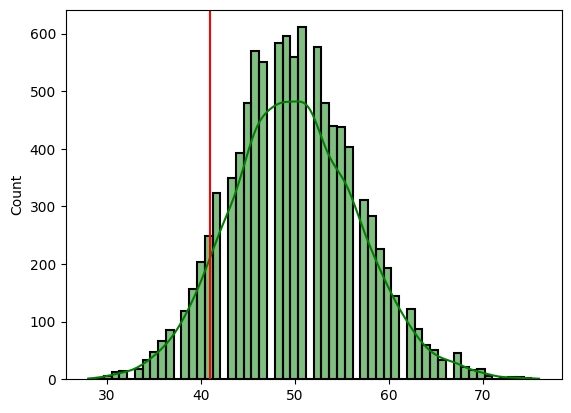

In [7]:
null_outcomes = []

for i in range(10000):
    simulated_monthly_visitors = np.random.choice(["y", "n"], size=500, p=[0.1, 0.9])

    num_purchased = np.sum(simulated_monthly_visitors == "y")

    null_outcomes.append(num_purchased)

# plot the histogram here:
sns.histplot(null_outcomes, kde=True, color="green", linewidth=1.5, edgecolor="black")
plt.axvline(41, color="r")
plt.show()

### **Confidence Intervals**

By reporting an interval covering 95% of the values instead of the full range, we can say something like: “we are 95% confident that, if each visitor has a 10% chance of making a purchase, a random sample of 500 visitors will make between 37 and 63 purchases.” We can use the `np.percentile()` function to calculate this 95% interval as follows:

In [8]:
# calculate the 90% interval here:
null_90CI = np.percentile(null_outcomes, [5, 95])
print(null_90CI)

[39. 61.]


### **p-value**

P-value calculations and interpretations depend on the alternative hypothesis of a test, a description of the difference from expectation that we are interested in.

In [9]:
# calculate the p-value here:
null_outcomes = np.array(null_outcomes)
p_value = np.sum(null_outcomes <= 41) / len(null_outcomes)
print(p_value)

0.1014


In the previous exercise, we calculated a one-sided p-value. In this exercise, we’ll estimate a p-value for a 2-sided test, which is the default setting for many functions in Python (and other languages, like R!).

In [10]:
# calculate the p-value here:
null_outcomes = np.array(null_outcomes)
p_value = np.sum((null_outcomes <= 41) | (null_outcomes >= 59)) / len(null_outcomes)
print(p_value)

0.2052


### **Significance Thresholds**

Sometimes, when we run a hypothesis test, we simply report a p-value or a confidence interval and give an interpretation (eg., the p-value was 0.05, which means that there is a 5% chance of observing two or fewer heads in 10 coin flips).

In other situations, we want to use our p-value to make a decision or answer a yes/no question. For example, suppose that we’re developing a new quiz question at Codecademy and want learners to have a 70% chance of getting the question right (higher would mean the question is too easy, lower would mean the question is too hard). We show our quiz question to a sample of 100 learners and 60 of them get it right. Is this significantly different from our target of 70%? If so, we want to remove the question and try to rewrite it.

In order to turn a p-value, which is a probability, into a yes or no answer, data scientists often use a pre-set significance threshold. The significance threshold can be any number between 0 and 1, but a common choice is 0.05. P-values that are less than this threshold are considered “significant”, while larger p-values are considered “not significant”.

### **Error Types**

Whenever we run a hypothesis test using a significance threshold, we expose ourselves to making two different kinds of mistakes: type I errors (false positives) and type II errors (false negatives):

Consider the quiz question hypothesis test described in the previous exercises:
- Null: The probability that a learner answers a question correctly is 70%.
- Alternative: The probability that a learner answers a question correctly is not 70%.

Suppose, for a moment, that the true probability of a learner answering the question correctly is 70% (if we showed the question to ALL learners, exactly 70% would answer it correctly). This puts us in the first column of the table above (the null hypothesis “is true”). If we run a test and calculate a significant p-value, we will make type I error (also called a false positive because the p-value is falsely significant), leading us to remove the question when we don’t need to.

On the other hand, if the true probability of getting the question correct is not 70%, the null hypothesis “is false” (the right-most column of our table). If we run a test and calculate a non-significant p-value, we make a type II error, leading us to leave the question on our site when we should have taken it down.

#### **Type I Error**

It turns out that, when we run a hypothesis test with a significance threshold, the significance threshold is equal to the type I error (false positive) rate for the test. 

### **Kolmogorov–Smirnov Test**

Often in statistics we need to understand if a given sample comes from a specific distribution, most commonly the Normal (or Gaussian) distribution. For this intent we have the so-called normality tests, such as Shapiro-Wilk, Anderson-Darling or the Kolmogorov-Smirnov test.

All of them measure how likely a sample is to have come from a normal distribution, with a related p-value to support this measurement. The Kolmogorov-Smirnov test, however, goes one step further and allows us to compare two samples, and tells us the chance they both come from the same distribution.

In a simple way we can define the KS statistic for the 2-sample test as the greatest distance between the CDFs (Cumulative Distribution Function) of each sample. If $p<0.05$ we reject the null hypothesis and assume that the sample does not come from a normal distribution.


In [ ]:
import numpy as np
from scipy.stats import ks_2samp

# Generate two example datasets
dataset1 = np.random.normal(loc=0, scale=1, size=1000)
dataset2 = np.random.normal(loc=0, scale=1, size=1000)

# Perform the Kolmogorov-Smirnov test
statistic, p_value = ks_2samp(dataset1, dataset2)

# Compare the test statistic against the critical value
alpha = 0.05  # Significance level
critical_value = 1.36 / np.sqrt(len(dataset1) + len(dataset2))
if statistic > critical_value:
    print("Reject the null hypothesis. The datasets are significantly different.")
else:
    print("Fail to reject the null hypothesis. The datasets are not significantly different.")

# Print the test statistic and p-value
print("Test Statistic (D):", statistic)
print("P-value:", p_value)

Reject the null hypothesis. The datasets are significantly different.
Test Statistic (D): 0.046
P-value: 0.24068202486600215



As an example, we can build three datasets with different levels of separation between classes (see the code to understand how they were built).

On the "good" dataset, the classes don’t overlap, and they have a good noticeable gap between them. On the "medium" one there is enough overlap to confuse the classifier. The overlap is so intense on the "bad" dataset that the classes are almost inseparable.

We can see the distributions of the predictions for each class by plotting histograms. On the x-axis we have the probability of an observation being classified as "positive" and on the y-axis the count of observations in each bin of the histogram:

The "good" example (left) has a perfect separation, as expected. The "medium" one (center) has a bit of an overlap, but most of the examples could be correctly classified. The classifier could not separate the "bad" example (right), though. We can now evaluate the KS and ROC AUC for each case:

The good (or should I say perfect) classifier got a perfect score in both metrics. The medium one got a ROC AUC of 0.908 which sounds almost perfect, but the KS score was 0.678, which reflects better the fact that the classes are not "almost perfectly" separable. Finally, the bad classifier got an AUC Score of 0.57, which is bad (for us data lovers that know 0.5 = worst case) but doesn’t sound as bad as the KS score of 0.126.

### **Shapiro–Wilk Test**

The Shapiro–Wilk test is a test of normality. It was published in 1965 by Samuel Sanford Shapiro and Martin Wilk. The Shapiro–Wilk test tests the null hypothesis that a sample came from a normally distributed population. 

In [ ]:
from scipy.stats import shapiro

statistic, p_value = shapiro(dataset1)

# Compare the test statistic against the critical value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. The dataset is not normally distributed.")
else:
    print("Fail to reject the null hypothesis. The dataset is normally distributed")

# Print the test statistic and p-value
print("Test Statistic (D):", statistic)
print("P-value:", p_value)

Fail to reject the null hypothesis. The dataset is normally distributed
Test Statistic (D): 0.9983252170878165
P-value: 0.44608294346546973


### **One Sample t-Tests**

One-sample t-tests are used for comparing a sample average to a hypothetical population average. For example, a one-sample t-test might be used to address questions such as:

- Is the average amount of time that visitors spend on a website different from 5 minutes?
- Is the average amount of money that customers spend on a purchase more than 10 USD?

Suppose that we want to run a one-sample t-test with the following null and alternative hypotheses:

- Null $H_0$: The average sepal length is 5.8cm.
- Alternative $H_1$: The average sepal length is not 5.8cm.

SciPy has a function called `ttest_1samp()`, which performs a one-sample t-test for you. `ttest_1samp()` requires two inputs, a sample distribution and a mean to test against:

In [ ]:
from scipy.stats import ttest_1samp

sample_data = df.person_age
test_mean = 27

tstat, pval = ttest_1samp(sample_data, test_mean)
print(tstat, pval)

20.887708532815566 2.96582964117768e-96


It returns two outputs: the t-statistic (which we won’t cover in this course), and the p-value.

When running any hypothesis test, it is important to know and verify the assumptions of the test. The assumptions of a one-sample t-test are as follows:

- The sample was randomly selected from the population
- The individual observations were independent
- The data is normally distributed without outliers OR the sample size is large (enough)

### **Binomial Tests**

Binomial tests are useful for comparing the frequency of some outcome in a sample to the expected probability of that outcome. For example, if we expect 90% of ticketed passengers to show up for their flight but only 80 of 100 ticketed passengers actually show up, we could use a binomial test to understand whether 80 is significantly different from 90.

Binomial tests are similar to one-sample t-tests in that they test a sample statistic against some population-level expectation. The difference is that:

- binomial tests are used for binary categorical data to compare a sample frequency to an expected population-level probability
- one-sample t-tests are used for quantitative data to compare a sample mean to an expected population mean.

SciPy has a function called `binom_test()`, which performs a binomial test for you. The default alternative hypothesis for the `binom_test()` function is two-sided, but this can be changed using the alternative parameter (eg., `alternative = 'less'` will run a one-sided lower tail test).

`binom_test()` requires three inputs, the number of observed successes, the number of total trials, and an expected probability of success.

In [ ]:
from scipy.stats import binomtest

# calculate p_value_2sided here:
p_value_2sided = binomtest(df.loan_status.sum(), len(df), 0.1)
print(p_value_2sided)

p_value_1sided = binomtest(df.loan_status.sum(), len(df), 0.1, alternative="less")
print(p_value_1sided)

BinomTestResult(k=7108, n=32581, alternative='two-sided', statistic=0.21816396059052823, pvalue=0.0)
BinomTestResult(k=7108, n=32581, alternative='less', statistic=0.21816396059052823, pvalue=1.0)


## **Hypothesis Testing: Bivariate**

We’ll use hypothesis tests to make inference about population-level associations between two variables. We will cover four different hypothesis tests:

- Two Sample T-Tests (for an association between a quantitative variable and a binary categorical variable)
- ANOVA and Tukey Tests (for an association between a quantitative variable and a non-binary categorical variable)
- Chi-Square Tests (for an association between two categorical variables)

### **Two-Sample T-Test**

#### **Binary Variable**

Suppose that a company is considering a new color-scheme for their website. They think that visitors will spend more time on the site if it is brightly colored. To test this theory, the company shows the old and new versions of the website to 50 site visitors, each — and finds that, on average, visitors spent 2 minutes longer on the new version compared to the old. Will this be true of future visitors as well? Or could this have happened by random chance among the 100 people in this sample?

One way of testing this is with a 2-sample t-test. The null hypothesis for this test is that average length of a visit does not differ based on the color of the website. In other words, if we could observe all site visitors in two alternate universes (one where they see each version of the site), the average visiting times in these universes would be equal.

We can use SciPy’s `ttest_ind()` function to perform a 2-sample t-test. It takes the values for each group as inputs and returns the t-statistic (not covered in this course) and a p-value:

In [11]:
from scipy.stats import ttest_ind

old = np.array([20, 22, 24, 26, 28])
new = np.array([19, 22, 24, 26, 29])

tstat, pval = ttest_ind(old, new)
print(tstat, pval)

0.0 1.0


By default, `ttest_ind()` runs a two-sided test.

#### **Categorical Variable**

In the previous exercise, we used a two-sample t-test to investigate an association between a quantitative variable (time spent on a website) and a binary categorical variable (an old color scheme or a new color scheme).

In some circumstances, we might instead care about an association between a quantitative variable and a non-binary categorical variable (non-binary means more than two categories).

For example, suppose that we own a chain of stores that sell ants, called VeryAnts. There are three different locations: A, B, and C. We want to know whether customers are spending a significantly different amount per order at any of the locations.

There are three different comparisons we could make: A vs. B, B vs. C, and A vs. C. One way to answer our question is to simply run three separate 2-sample t-tests.

In [12]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([2, 3, 4, 5, 6])
c = np.array([3, 4, 5, 6, 7])

a_b_tval, a_b_pval = ttest_ind(a, b)
a_c_tval, a_c_pval = ttest_ind(a, c)
b_c_tval, b_c_pval = ttest_ind(b, c)

print("A to B comparison:", a_b_pval)
print("A to C comparison:", a_c_pval)
print("B to C comparison:", b_c_pval)

A to B comparison: 0.34659350708733416
A to C comparison: 0.08051623795726257
B to C comparison: 0.34659350708733416


### **ANOVA**

In the last exercise, we ran three separate 2-sample t-tests to investigate an association between a quantitative variable (amount spent per sale) and a non-binary categorical variable (location of VeryAnts visited, with options A, B, and C). The problem with this approach is that it inflates our probability of a type I error; the more tests we run, the worse the problem becomes!

In this situation, one approach is to instead use ANOVA (Analysis of Variance). ANOVA tests the null hypothesis that all groups have the same population mean (eg., the true average price of a sale is the same at every location of VeryAnts).

In Python, we can use the SciPy function `f_oneway()` to perform an ANOVA. `f_oneway()` has two outputs: the F-statistic (not covered in this course) and the p-value. If we were comparing scores on a video-game for math majors, writing majors, and psychology majors, we could run an ANOVA test with this line:

In [13]:
from scipy.stats import f_oneway

scores_mathematicians = [100, 90, 80, 85, 95]
scores_writers = [90, 85, 75, 80, 70]
scores_psychologists = [85, 80, 75, 90, 95]

fstat, pval = f_oneway(scores_mathematicians, scores_writers, scores_psychologists)
print(fstat, pval)

2.0 0.17797851562499997


If the p-value is below our significance threshold, we can conclude that at least one pair of our groups earned significantly different scores on average; however, we won’t know which pair until we investigate further!

### **Tukey's Range Test**

Let’s say that we have performed an ANOVA to compare sales at the three VeryAnts stores. We calculated a p-value less than 0.05 and concluded that there is a significant difference between at least one pair of stores. Now, we want to find out which pair of stores are different. This is where Tukey’s range test comes in handy!

In Python, we can perform Tukey’s range test using the `statsmodels` function `pairwise_tukeyhsd()`. For example, suppose we are again comparing video-game scores for math majors, writing majors, and psychology majors. We have a dataset named data with two columns: `score` and `major`. We could run Tukey’s range test with a type I error rate of 0.05 as follows:

In [14]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = pd.DataFrame(
    {
        "score": [100, 90, 80, 85, 95, 90, 85, 75, 80, 70, 85, 80, 75, 90, 95],
        "major": ["mathematicians"] * 5 + ["writers"] * 5 + ["psychologists"] * 5,
    }
)

tukey_results = pairwise_tukeyhsd(data.score, data.major, 0.05)
print(tukey_results)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2    meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------
mathematicians psychologists     -5.0 0.5908 -18.3393 8.3393  False
mathematicians       writers    -10.0 0.1546 -23.3393 3.3393  False
 psychologists       writers     -5.0 0.5908 -18.3393 8.3393  False
-------------------------------------------------------------------


Tukey’s range test is similar to running three separate 2-sample t-tests, except that it runs all of these tests simultaneously in order to preserve the type I error rate. The function output is a table, with one row per pair-wise comparison. For every comparison where `reject` is `True`, we “reject the null hypothesis” and conclude there is a significant difference between those two groups. 

### **Chi-Square Test**

If we want to understand whether the outcomes of two categorical variables are associated, we can use a Chi-Square test. It is useful in situations like:
- An A/B test where half of users were shown a green submit button and the other half were shown a purple submit button. Was one group more likely to click the submit button?
- People under and over age 40 were given a survey asking “Which of the following three products is your favorite?” Did these age groups have significantly different preferences?

In SciPy, we can use the function `chi2_contingency()` to perform a Chi-Square test. The input to `chi2_contingency` is a contingency table, which can be created using the pandas `crosstab()` function as follows:

In [15]:
import pandas as pd
from scipy.stats import chi2_contingency

# read in and print data
df = pd.DataFrame(
    {
        "gender": ["M", "M", "M", "F", "F", "F", "M", "F", "F", "F"],
        "purchase_status": ["P", "NP", "P", "NP", "P", "NP", "P", "NP", "P", "NP"],
    }
)

# create contingency table
table = pd.crosstab(df.gender, df.purchase_status)
print(table)

# run Chi-Square test and print p-value
chi2, pval, dof, expected = chi2_contingency(table)
print(pval)

purchase_status  NP  P
gender                
F                 4  2
M                 1  3
0.5186050164287255


If the p-value is below our chosen threshold (often 0.05), we reject the null hypothesis and can conclude there is a statistically significant association between the two variables (eg. men, women, and non-binary people appear to have different probabilities of making a purchase, so gender is associated with purchase-status).

### **Assumptions**

Before we use a two sample t-test, ANOVA, or Tukey’s range test, we need to be sure that the following things are true:

1. The observations should be independently randomly sampled from the population
2. The standard deviations of the groups should be equal.  To check this assumption, it is normally sufficient to divide one standard deviation by the other and see if the ratio is “close” to 1. Generally, a ratio between 0.9 and 1.1 should suffice.
    - That said, there is also a way to run a 2-sample t-test without assuming equal standard deviations — for example, by setting the `equal_var` parameter in the `scipy.stats.ttest_ind()` function equal to `False`. Running the test in this way has some disadvantages (it essentially makes it harder to reject the null hypothesis even when there is a true difference between groups), so it’s important to check for equal standard deviations before running the test.
3. The data should be normally distributed…ish. Data analysts in the real world often still perform these tests on data that are not normally distributed. This is usually not a problem if sample size is large, but it depends on how non-normal the data is. In general, the bigger the sample size, the safer you are!
4. The groups created by the categorical variable must be independent.

Before we use a Chi-Square test, we need to be sure that the following things are true:

1. The observations should be independently randomly sampled from the population
2. The categories of both variables must be mutually exclusive
3. The groups should be independent. Similar to 2-sample t-tests, ANOVA, and Tukey, a Chi-Square test also shouldn’t be used if either of the categorical variables splits observations into groups that can influence one another. For example, a Chi-Square test would not be appropriate if one of the variables represents three different time points.


# **Extra Reading**

https://medium.com/@data-overload/the-kolmogorov-smirnov-test-56e18ba621de